In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [67]:
import warnings 
warnings.filterwarnings(action='ignore')

In [68]:
train=pd.read_csv("D:/ml project/aug_train.csv")
train

enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience                 NaN        Graduate   
4      Has relevent experience       no_enrollment         Masters   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
0                 STEM        >20          NaN             NaN            1   
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5          NaN             NaN        never   
3      Business Degree         <1          NaN         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
...                ...        ...          ...             ...          ...   
19153       Humanities         14          NaN             NaN            1   
19154             STEM         14          NaN             NaN            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156              NaN         <1      500-999         Pvt Ltd            2   
19157              NaN          2          NaN             NaN            1   

       training_hours  target  
0                  36     1.0  
1                  47     0.0  
2                  83     0.0  
3                  52     1.0  
4                   8     0.0  
...               ...     ...  
19153              42     1.0  
19154              52     1.0  
19155              44     0.0  
19156              97     0.0  
19157             127     0.0  

[19158 rows x 14 columns]

In [69]:
val=pd.read_csv("D:/ml project/aug_test.csv")
val

enrollee_id      city  city_development_index  gender  \
0           32403   city_41                   0.827    Male   
1            9858  city_103                   0.920  Female   
2           31806   city_21                   0.624    Male   
3           27385   city_13                   0.827    Male   
4           27724  city_103                   0.920    Male   
...           ...       ...                     ...     ...   
2124         1289  city_103                   0.920    Male   
2125          195  city_136                   0.897    Male   
2126        31762  city_100                   0.887    Male   
2127         7873  city_102                   0.804    Male   
2128        12215  city_102                   0.804    Male   

          relevent_experience enrolled_university education_level  \
0     Has relevent experience    Full time course        Graduate   
1     Has relevent experience       no_enrollment        Graduate   
2      No relevent experience       no_enrollment     High School   
3     Has relevent experience       no_enrollment         Masters   
4     Has relevent experience       no_enrollment        Graduate   
...                       ...                 ...             ...   
2124   No relevent experience       no_enrollment        Graduate   
2125  Has relevent experience       no_enrollment         Masters   
2126   No relevent experience       no_enrollment  Primary School   
2127  Has relevent experience    Full time course     High School   
2128  Has relevent experience       no_enrollment         Masters   

     major_discipline experience company_size   company_type last_new_job  \
0                STEM          9          <10            NaN            1   
1                STEM          5          NaN        Pvt Ltd            1   
2                 NaN         <1          NaN        Pvt Ltd        never   
3                STEM         11        10/49        Pvt Ltd            1   
4                STEM        >20       10000+        Pvt Ltd           >4   
...               ...        ...          ...            ...          ...   
2124       Humanities         16          NaN  Public Sector            4   
2125             STEM         18          NaN            NaN            2   
2126              NaN          3          NaN        Pvt Ltd        never   
2127              NaN          7      100-500  Public Sector            1   
2128             STEM         15       10000+        Pvt Ltd            2   

      training_hours  
0                 21  
1                 98  
2                 15  
3                 39  
4                 72  
...              ...  
2124              15  
2125              30  
2126              18  
2127              84  
2128              11  

[2129 rows x 13 columns]

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [71]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [72]:
val.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [73]:
train.shape

(19158, 14)

In [74]:
val.shape

(2129, 13)

In [75]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [76]:
train.isna().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [77]:
val.isna().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.238610
relevent_experience       0.000000
enrolled_university       0.014561
education_level           0.024425
major_discipline          0.146548
experience                0.002349
company_size              0.292156
company_type              0.297792
last_new_job              0.018788
training_hours            0.000000
dtype: float64

In [78]:
train.describe(include='all')

enrollee_id      city  city_development_index gender  \
count   19158.000000     19158            19158.000000  14650   
unique           NaN       123                     NaN      3   
top              NaN  city_103                     NaN   Male   
freq             NaN      4355                     NaN  13221   
mean    16875.358179       NaN                0.828848    NaN   
std      9616.292592       NaN                0.123362    NaN   
min         1.000000       NaN                0.448000    NaN   
25%      8554.250000       NaN                0.740000    NaN   
50%     16982.500000       NaN                0.903000    NaN   
75%     25169.750000       NaN                0.920000    NaN   
max     33380.000000       NaN                0.949000    NaN   

            relevent_experience enrolled_university education_level  \
count                     19158               18772           18698   
unique                        2                   3               5   
top     Has relevent experience       no_enrollment        Graduate   
freq                      13792               13817           11598   
mean                        NaN                 NaN             NaN   
std                         NaN                 NaN             NaN   
min                         NaN                 NaN             NaN   
25%                         NaN                 NaN             NaN   
50%                         NaN                 NaN             NaN   
75%                         NaN                 NaN             NaN   
max                         NaN                 NaN             NaN   

       major_discipline experience company_size company_type last_new_job  \
count             16345      19093        13220        13018        18735   
unique                6         22            8            6            6   
top                STEM        >20        50-99      Pvt Ltd            1   
freq              14492       3286         3083         9817         8040   
mean                NaN        NaN          NaN          NaN          NaN   
std                 NaN        NaN          NaN          NaN          NaN   
min                 NaN        NaN          NaN          NaN          NaN   
25%                 NaN        NaN          NaN          NaN          NaN   
50%                 NaN        NaN          NaN          NaN          NaN   
75%                 NaN        NaN          NaN          NaN          NaN   
max                 NaN        NaN          NaN          NaN          NaN   

        training_hours        target  
count     19158.000000  19158.000000  
unique             NaN           NaN  
top                NaN           NaN  
freq               NaN           NaN  
mean         65.366896      0.249348  
std          60.058462      0.432647  
min           1.000000      0.000000  
25%          23.000000      0.000000  
50%          47.000000      0.000000  
75%          88.000000      0.000000  
max         336.000000      1.000000

In [79]:
train['company_size'] = train['company_size'].replace('50-99',(50+99)/2).replace('100-500',(100+500)/2).replace('10/49',(10+49)/2).replace('500-999',(999+500)/2).replace('1000-4999',(1000+4999)/2).replace('100-500',(100+500)/2).replace('5000-9999',(5000+9999)/2).replace('10000+',(10000)).replace('<10',9)
val['company_size'] = val['company_size'].replace('50-99',(50+99)/2).replace('100-500',(100+500)/2).replace('10/49',(10+49)/2).replace('500-999',(999+500)/2).replace('1000-4999',(1000+4999)/2).replace('100-500',(100+500)/2).replace('5000-9999',(5000+9999)/2).replace('10000+',(10000)).replace('<10',9)

In [80]:
train['experience'] = (train['experience'].str.replace('<',' ')).str.replace('>',' ')
train['last_new_job'] = train['last_new_job'].replace('>4','5').replace('never','0')
train['Large_company'] = train['company_size'].apply(lambda x: x if x>2999.5 else 0)
train['Small_company'] = train['company_size'].apply(lambda x: x if x<300 else 0)
train['Medium_company'] = train['company_size'].apply(lambda x: x if x<2999.5 and x>300 else 0)

val['experience'] = (val['experience'].str.replace('<',' ')).str.replace('>',' ')
val['last_new_job'] = val['last_new_job'].replace('>4','5').replace('never','0')
val['Large_company'] = val['company_size'].apply(lambda x: x if x>2999.5 else 0)
val['Small_company'] = val['company_size'].apply(lambda x: x if x<300 else 0)
val['Medium_company'] = val['company_size'].apply(lambda x: x if x<2999.5 and x>300 else 0)

In [81]:
train['experience'] =  pd.to_numeric(train['experience'])
train['last_new_job'] = pd.to_numeric(train['last_new_job'])
train['city_numeric'] = pd.to_numeric(train['city'].str.split('_').str[1])

val['experience'] =  pd.to_numeric(val['experience'])
val['last_new_job'] = pd.to_numeric(val['last_new_job'])
val['city_numeric'] = pd.to_numeric(val['city'].str.split('_').str[1])

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  float64
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  Large_company           19158 non-null

In [83]:
def missing(feature,cat='median'):
    catg_colm = ['city',
                 'gender',
                 'relevent_experience',
                 'enrolled_university',
                 'education_level',
                 'major_discipline',
                 'company_type',
                 'last_new_job',
                'company_size']
    num_colm = ['city_development_index',
                'relevent_experience',
                'experience',
                'training_hours']
    try:
        if feature in num_colm and cat == 'mean':
            return train[feature].mean()
        elif feature in num_colm and cat == 'median':
            return train[feature].median()
        elif feature in catg_colm and cat == 'mode':
            return train[feature].mode()[0]
    except:
        return np.nan

In [84]:
train['city'].fillna(missing(feature='city',cat='mode'),inplace=True)
train['gender'].fillna(missing(feature='gender',cat='mode'),inplace=True)
train['enrolled_university'].fillna(missing(feature='enrolled_university',cat='mode'),inplace=True)
train['education_level'].fillna(missing(feature='education_level',cat='mode'),inplace=True)
train['major_discipline'].fillna(missing(feature='major_discipline',cat='mode'),inplace=True)
train['experience'].fillna(missing(feature='experience',cat='median'),inplace=True)
train['company_size'].fillna(missing(feature='company_size',cat='mode'),inplace=True)
train['last_new_job'].fillna(missing(feature='last_new_job',cat='mode'),inplace=True)
train['company_type'].fillna(missing(feature='last_new_job',cat='mode'),inplace=True)

In [85]:
val['city'].fillna(missing(feature='city',cat='mode'),inplace=True)
val['gender'].fillna(missing(feature='gender',cat='mode'),inplace=True)
val['enrolled_university'].fillna(missing(feature='enrolled_university',cat='mode'),inplace=True)
val['education_level'].fillna(missing(feature='education_level',cat='mode'),inplace=True)
val['major_discipline'].fillna(missing(feature='major_discipline',cat='mode'),inplace=True)
val['experience'].fillna(missing(feature='experience',cat='median'),inplace=True)
val['company_size'].fillna(missing(feature='company_size',cat='mode'),inplace=True)
val['last_new_job'].fillna(missing(feature='last_new_job',cat='mode'),inplace=True)
val['company_type'].fillna(missing(feature='last_new_job',cat='mode'),inplace=True)

In [86]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
Large_company             0
Small_company             0
Medium_company            0
city_numeric              0
dtype: int64

In [87]:
val.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
Large_company             0
Small_company             0
Medium_company            0
city_numeric              0
dtype: int64

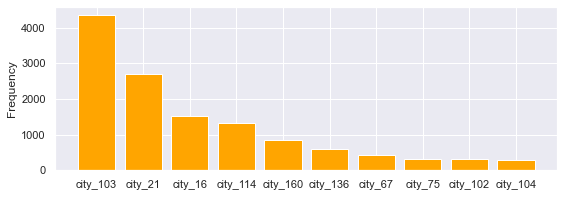

In [88]:
df_city = pd.DataFrame(train['city'].value_counts())
city_col = df_city['city'][:10]
city_index = df_city.index[:10]

#city
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3))
plt.bar(city_index, city_col, color="orange")
plt.ylabel("Frequency")
plt.show()

In [93]:

def valuecounts(column):
  valcount = column.value_counts()
  distribution = column.value_counts(normalize=True)*100

  distribution_df = pd.DataFrame({'Count':valcount,
                              'Percent': round(distribution,2)})
  return print(distribution_df,'\n')

        Count  Percent
Male    17729    92.54
Female   1238     6.46
Other     191     1.00 



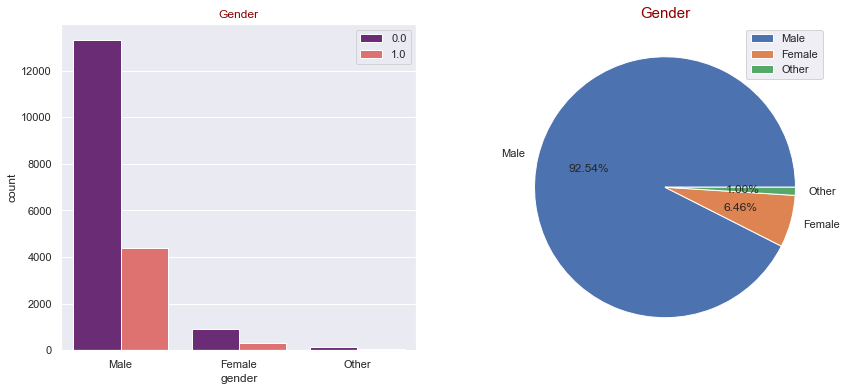

In [94]:
#gender 
import seaborn as sns
gender = train["gender"].value_counts()

valuecounts(train["gender"])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(train["gender"], hue = "target", data = train,palette="magma")
plt.title("Gender", color = "darkred")
plt.legend()

plt.subplot(1,2,2)
plt.pie(gender.values, labels=gender.index, autopct='%1.2f%%')
plt.title('Gender',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

                         Count  Percent
Has relevent experience  13792    71.99
No relevent experience    5366    28.01 



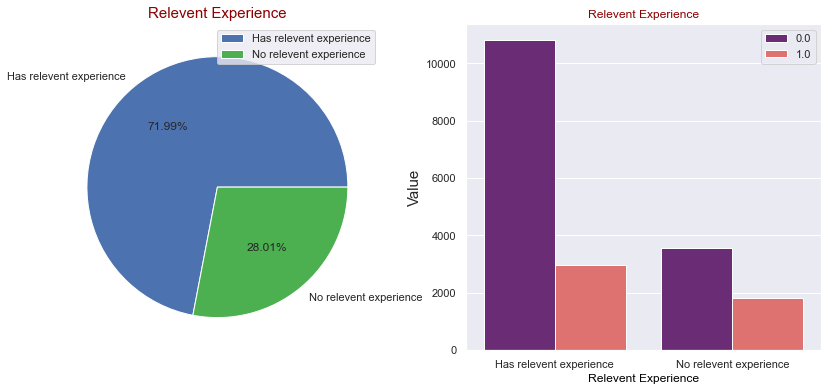

In [96]:
#relevent_experience

experience = train["relevent_experience"].value_counts()

valuecounts(train["relevent_experience"])

experience_index = experience.index
experience_values = experience.values

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
colrs= [ "b", "#4CAF50"]
plt.pie(experience_values, labels=experience_index, autopct='%1.2f%%',colors=colrs)
plt.title('Relevent Experience',color = 'darkred',fontsize = 15)
plt.legend()

plt.subplot(1,2,2)
ax= sns.countplot(train["relevent_experience"], hue = "target", data = train,palette="magma")
plt.xlabel('Relevent Experience', size = 12, color = "black") 
plt.ylabel('Value', size = 15) 
plt.title('Relevent Experience', color = "darkred")
plt.legend()
plt.show()

                  Count  Percent
no_enrollment     14203    74.14
Full time course   3757    19.61
Part time course   1198     6.25 



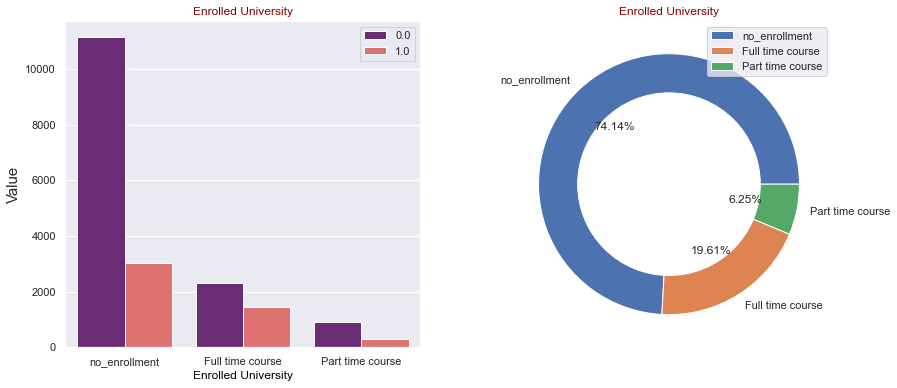

In [98]:
#enrolled_university 

valuecounts(train["enrolled_university"])

university = train["enrolled_university"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax= sns.countplot(train["enrolled_university"], hue = "target", data = train,palette="magma")
plt.xlabel('Enrolled University', size = 12, color = "black") 
plt.ylabel('Value', size = 15) 
plt.title('Enrolled University', color = "darkred")
plt.legend()

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.7,color = "white")
plt.pie(university.values, labels = university.index,  autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Enrolled University", color = "darkred")
plt.legend()
plt.show()


                Count  Percent
Graduate        12058    62.94
Masters          4361    22.76
High School      2017    10.53
Phd               414     2.16
Primary School    308     1.61 



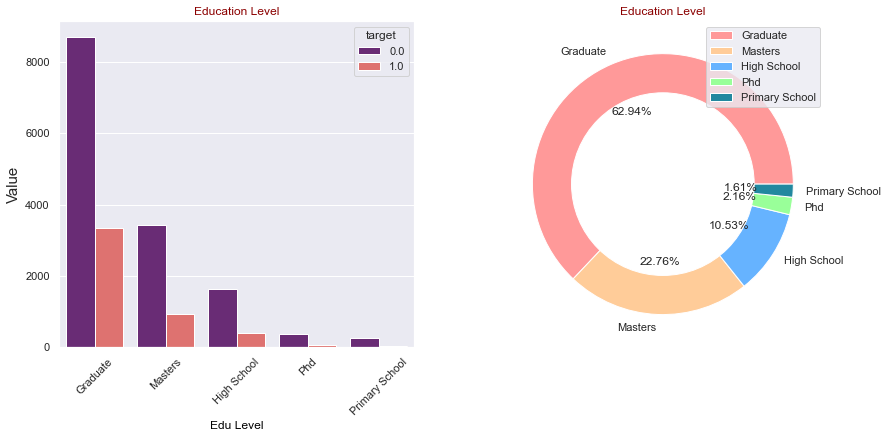

In [99]:
#education_level

valuecounts(train["education_level"])

edu_level = train["education_level"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax = sns.countplot(train["education_level"], hue = "target", data = train,palette="magma")
plt.xlabel('Edu Level', size = 12, color = "black") 
plt.xticks(rotation = 45)
plt.ylabel('Value', size = 15) 
plt.title('Education Level', color = "darkred")

#add colors
colors = ['#ff9999','#ffcc99','#66b3ff','#99ff99','#22889f']

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.7,color = "white")
plt.pie(edu_level.values, labels = edu_level.index, colors = colors, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Education Level", color = "darkred")
plt.legend()
plt.show()


<AxesSubplot:ylabel='company_type'>

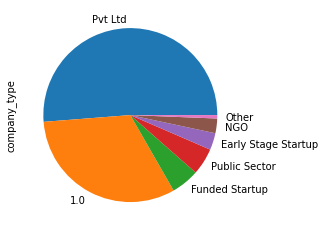

In [23]:
train['company_type'].value_counts().plot.pie()

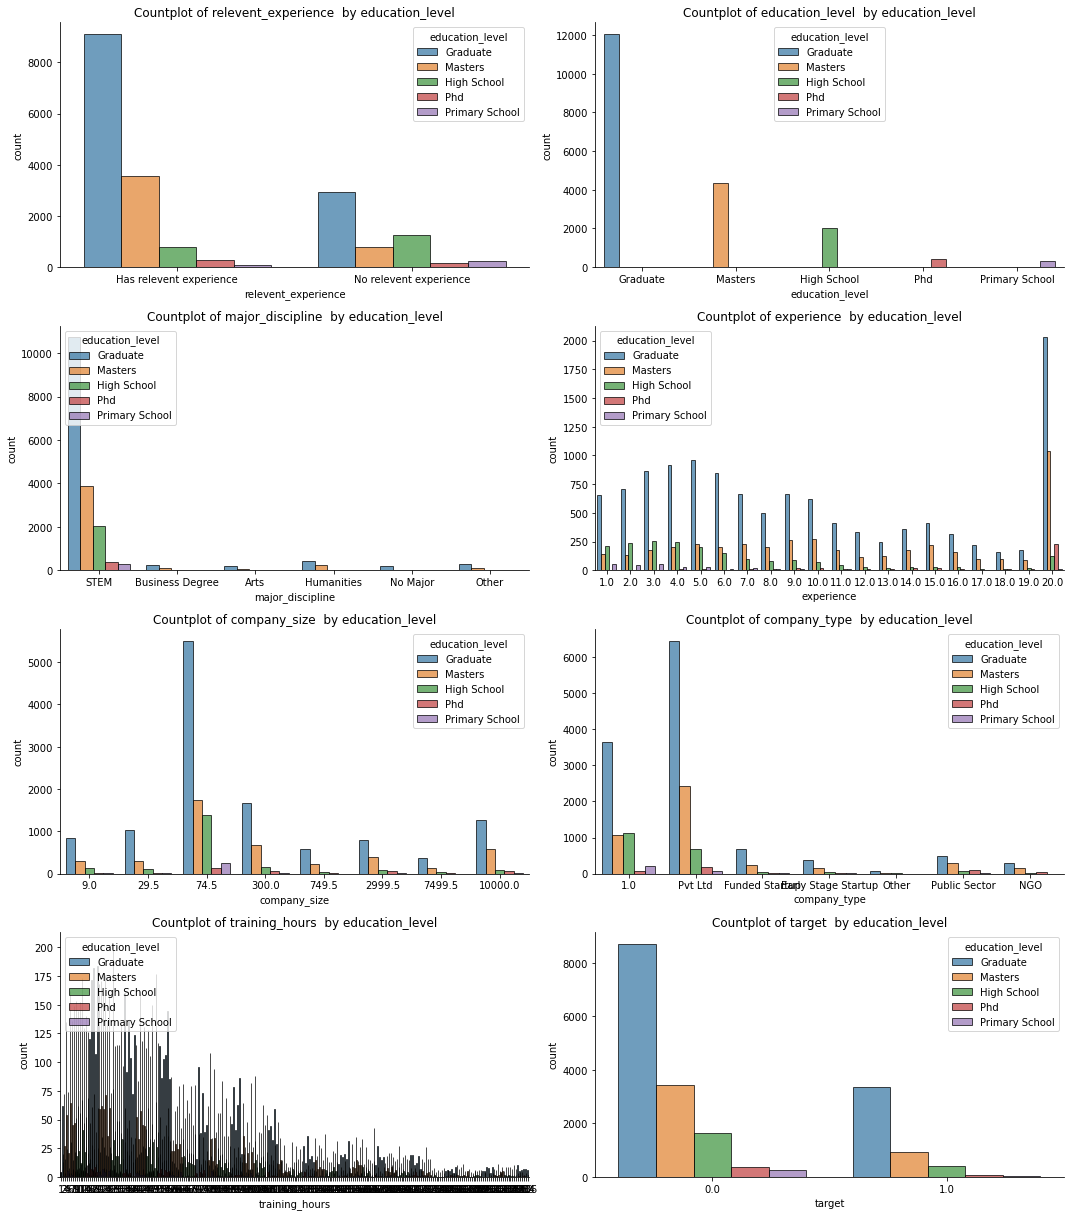

In [24]:
plt.figure(figsize=[15,17])
fft=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours","target"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=train)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

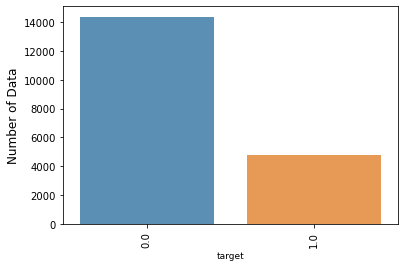

In [25]:
mnj = train['target'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(mnj.index, mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show();

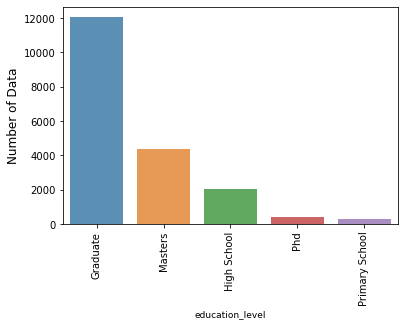

In [26]:
EL = train['education_level'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(EL.index, EL.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('education_level', fontsize=9)
plt.xticks(rotation=90)
plt.show();

In [27]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

el = train['education_level'].value_counts().reset_index()
el.columns = [
    'education_level', 
    'percent'
]
el['percent'] /= len(train)

fig = px.pie(
    el, 
    names='education_level', 
    values='percent', 
    title='Education_level', 
    width=800,
    height=500 
)

fig.show()

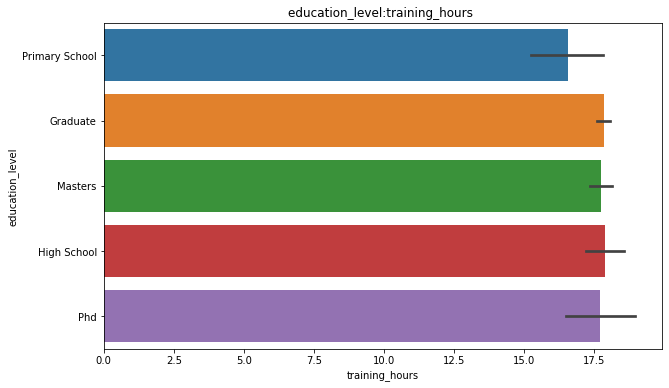

In [28]:
et = train.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=et.education_level, x=et.training_hours)
plt.xticks()
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('education_level:training_hours ')
plt.show()

In [29]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

ep = train['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(train)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience', 
    width=800,
    height=500 
)

fig.show()

Text(0.5, 1.0, 'Distributional of training_hours')

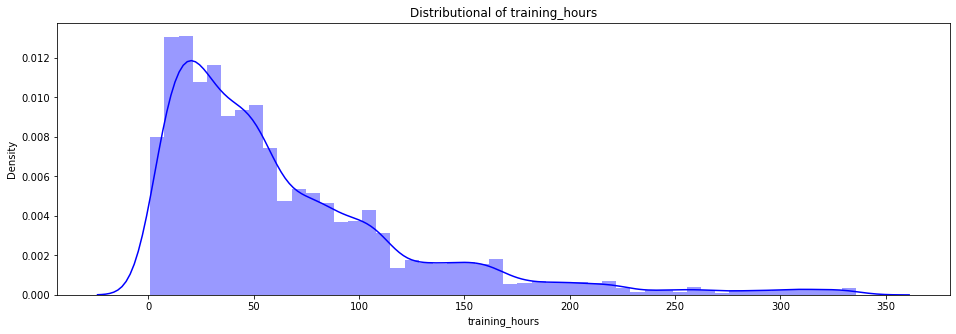

In [30]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train["training_hours"], color="blue",ax = axes)
plt.title("Distributional of training_hours")

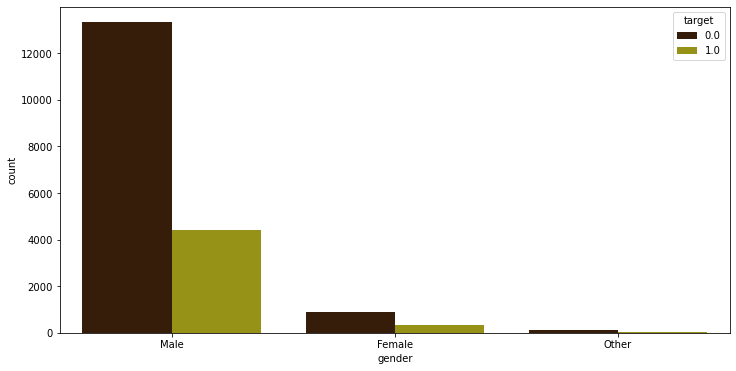

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x="gender",hue="target",data=train,palette=['#3D1C02',"#AAA602"])
plt.show()

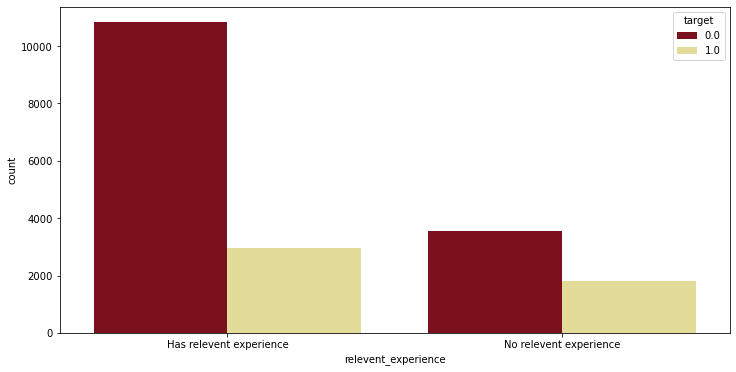

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x="relevent_experience",hue="target",data=train,palette=['#8C000F',"#F0E68C"])
plt.show()

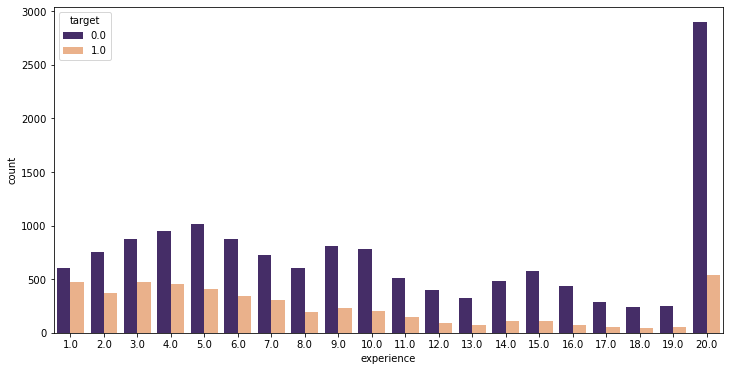

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x="experience",hue="target",data=train,palette=['#432371',"#FAAE7B"])
plt.show()

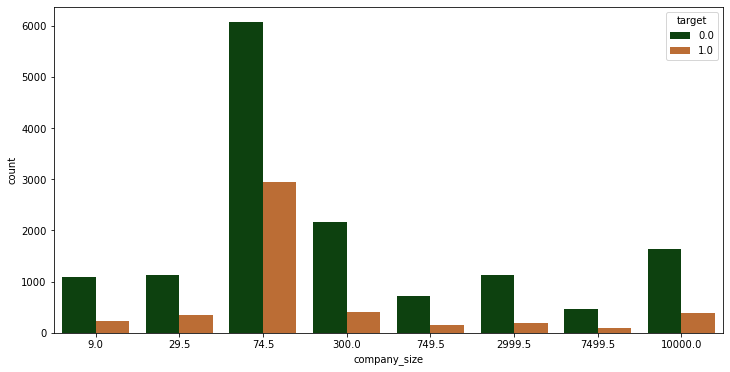

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x="company_size",hue="target",data=train,palette=['#054907',"#D2691E"])
plt.show()

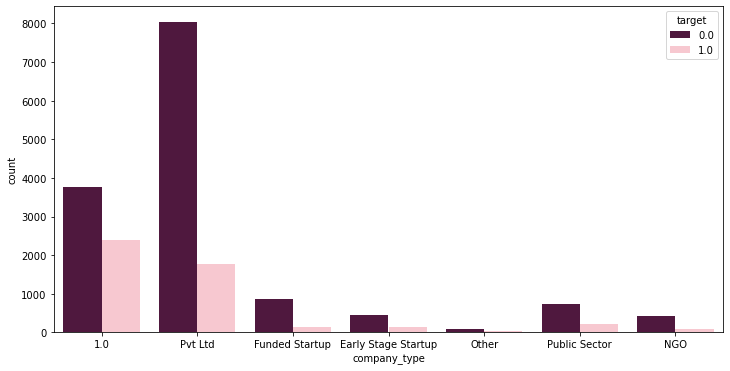

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x="company_type",hue="target",data=train,palette=['#580F41',"#FFC0CB"])
plt.show()

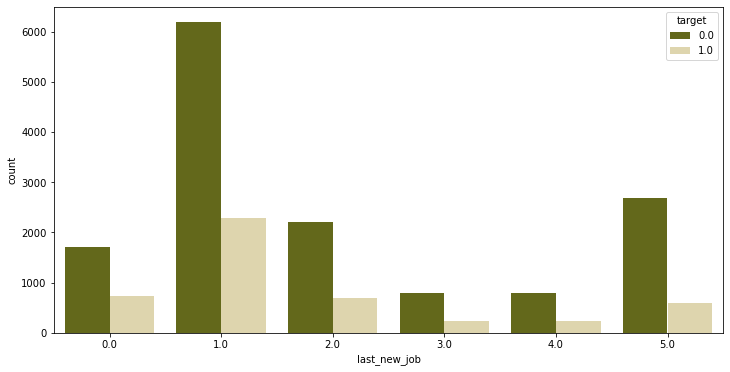

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x="last_new_job",hue="target",data=train,palette=['#6E750E',"#E6DAA6"])
plt.show()

<AxesSubplot:xlabel='gender', ylabel='training_hours'>

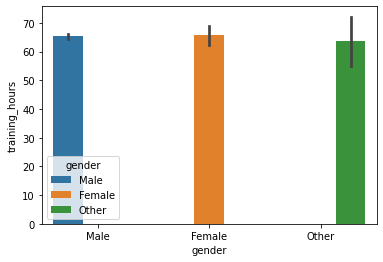

In [37]:
sns.barplot(data=train, x="gender", y="training_hours", hue="gender")
#Finding: Work hours are equal across genders.

<AxesSubplot:xlabel='gender', ylabel='target'>

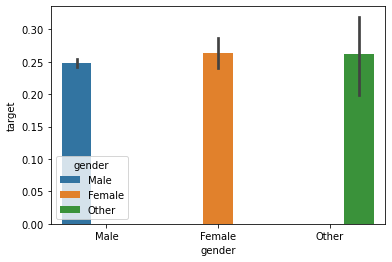

In [38]:
sns.barplot(data=train, x="gender", y="target", hue="gender")

<AxesSubplot:xlabel='education_level', ylabel='Count'>

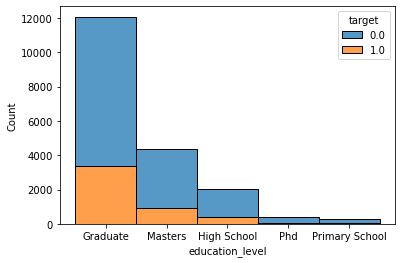

In [39]:
sns.histplot(data=train, x="education_level", hue="target", multiple="stack")

In [40]:
def func(x):
    y = train[["enrollee_id","city","city_development_index","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job","training_hours","target"]][train["education_level"] == x]
    y = y.sort_values(by="enrollee_id",ascending=False)
    return y.head(15)

# Graduate
Start from graduate, here I found :

If city_103 --> city_development_index: 0.920 --> the gender is male --> has relevent experience and experience > 20 --> move to new job (1)
If city_21 --> city_development_index: 0.624 --> the gender is male --> has relevent experience and experience 4 --> move to new job (1)
If city_19 --> city_development_index: 0.682 --> the gender is male --> has relevent experience and experience 6 --> move to new job (1)

In [41]:
func("Graduate")

enrollee_id      city  city_development_index gender  \
1663         33380   city_83                   0.923   Male   
4756         33379  city_103                   0.920   Male   
3351         33377   city_65                   0.802   Male   
17935        33375  city_103                   0.920   Male   
1762         33374   city_61                   0.913   Male   
8842         33368   city_61                   0.913   Male   
486          33367  city_103                   0.920   Male   
15902        33365  city_104                   0.924   Male   
18439        33362  city_173                   0.878   Male   
2276         33357   city_16                   0.910   Male   
7437         33356   city_90                   0.698   Male   
3011         33350   city_21                   0.624   Male   
8739         33349   city_21                   0.624   Male   
8525         33344   city_19                   0.682   Male   
1232         33340   city_75                   0.939   Male   

           relevent_experience enrolled_university education_level  \
1663    No relevent experience       no_enrollment        Graduate   
4756   Has relevent experience       no_enrollment        Graduate   
3351   Has relevent experience       no_enrollment        Graduate   
17935  Has relevent experience       no_enrollment        Graduate   
1762   Has relevent experience       no_enrollment        Graduate   
8842   Has relevent experience       no_enrollment        Graduate   
486    Has relevent experience       no_enrollment        Graduate   
15902  Has relevent experience       no_enrollment        Graduate   
18439  Has relevent experience       no_enrollment        Graduate   
2276   Has relevent experience       no_enrollment        Graduate   
7437   Has relevent experience       no_enrollment        Graduate   
3011   Has relevent experience       no_enrollment        Graduate   
8739    No relevent experience    Part time course        Graduate   
8525   Has relevent experience       no_enrollment        Graduate   
1232    No relevent experience    Full time course        Graduate   

      major_discipline  experience  company_size         company_type  \
1663              STEM        14.0       10000.0              Pvt Ltd   
4756              STEM        18.0           9.0              Pvt Ltd   
3351             Other        10.0         300.0              Pvt Ltd   
17935             STEM        16.0          74.5        Public Sector   
1762              STEM        10.0          74.5                  1.0   
8842              STEM        14.0         300.0              Pvt Ltd   
486               STEM        20.0          74.5                  1.0   
15902             STEM        11.0           9.0  Early Stage Startup   
18439             STEM        16.0       10000.0              Pvt Ltd   
2276              STEM         4.0         300.0              Pvt Ltd   
7437              STEM        20.0         300.0              Pvt Ltd   
3011              STEM         4.0           9.0              Pvt Ltd   
8739              STEM         2.0          29.5  Early Stage Startup   
8525              STEM         6.0          74.5                  1.0   
1232              STEM         5.0          74.5              Pvt Ltd   

       last_new_job  training_hours  target  
1663            2.0             168     0.0  
4756            2.0              81     0.0  
3351            2.0              27     0.0  
17935           1.0              51     0.0  
1762            2.0               3     0.0  
8842            3.0             154     0.0  
486             5.0             220     1.0  
15902           1.0              84     0.0  
18439           1.0             100     0.0  
2276            1.0              18     0.0  
7437            5.0              51     0.0  
3011            3.0               7     1.0  
8739            2.0              20     0.0  
8525            1.0              53     1.0  
1232            0.

# Masters
Here I found :

If city_136 --> city_development_index: 0.897 --> the gender is male --> has relevent experience and experience 6 --> move to new job (1)

If city_103 --> city_development_index: 0.920 --> the gender is male --> has relevent experience and experience 17 --> move to new job (1)

If city_159 --> city_development_index: 0.843 --> the gender is male --> has relevent experience and experience 7 --> move to new job (1)

If city_50 --> city_development_index: 0.896 --> the gender is male --> has relevent experience and experience 10 --> move to new job (1)

If city_106 --> city_development_index: 0.698 --> the gender is male --> has relevent experience and experience 8 --> move to new job (1)

If city_21 --> city_development_index: 0.624 --> the gender is male --> has relevent experience and experience 14 --> move to new job (1)

The last one is different from other

city_21 --> city_development_index: 0.624 --> the gender is male --> No relevent experience and experience 2 --> move to new job (1)

In [42]:
func("Masters")

enrollee_id      city  city_development_index  gender  \
5009         33376   city_16                   0.910  Female   
6947         33373  city_136                   0.897    Male   
2019         33360  city_103                   0.920    Male   
802          33358  city_159                   0.843  Female   
7530         33348   city_21                   0.624    Male   
15711        33325  city_103                   0.920    Male   
5475         33307  city_136                   0.897    Male   
11352        33306   city_50                   0.896    Male   
1270         33304  city_106                   0.698    Male   
16219        33301   city_21                   0.624    Male   
11948        33299  city_104                   0.924    Male   
11395        33298   city_44                   0.725    Male   
8967         33289   city_21                   0.624    Male   
6142         33286   city_21                   0.624    Male   
11085        33276  city_103                   0.920  Female   

           relevent_experience enrolled_university education_level  \
5009   Has relevent experience       no_enrollment         Masters   
6947   Has relevent experience       no_enrollment         Masters   
2019   Has relevent experience       no_enrollment         Masters   
802    Has relevent experience       no_enrollment         Masters   
7530    No relevent experience    Part time course         Masters   
15711  Has relevent experience       no_enrollment         Masters   
5475   Has relevent experience       no_enrollment         Masters   
11352   No relevent experience    Full time course         Masters   
1270   Has relevent experience       no_enrollment         Masters   
16219  Has relevent experience       no_enrollment         Masters   
11948  Has relevent experience       no_enrollment         Masters   
11395   No relevent experience       no_enrollment         Masters   
8967   Has relevent experience       no_enrollment         Masters   
6142    No relevent experience       no_enrollment         Masters   
11085  Has relevent experience       no_enrollment         Masters   

      major_discipline  experience  company_size   company_type  last_new_job  \
5009   Business Degree         8.0        2999.5  Public Sector           4.0   
6947              STEM         6.0         300.0  Public Sector           2.0   
2019              STEM        17.0          74.5            1.0           5.0   
802               STEM         7.0          74.5        Pvt Ltd           1.0   
7530              STEM        15.0         300.0        Pvt Ltd           0.0   
15711             STEM        20.0          74.5  Public Sector           1.0   
5475              STEM         7.0         300.0        Pvt Ltd           4.0   
11352             STEM        10.0          74.5            1.0           4.0   
1270              STEM         8.0          74.5            1.0           1.0   
16219             STEM        14.0          29.5            NGO           2.0   
11948             STEM        20.0        2999.5        Pvt Ltd           1.0   
11395             STEM        20.0           9.0        Pvt Ltd           5.0   
8967              STEM        10.0          29.5        Pvt Ltd           3.0   
6142              STEM         2.0         749.5  Public Sector           1.0   
11085       Humanities        20.0        2999.5            NGO           4.0   

       training_hours  target  
5009               74     0.0  
6947               34     1.0  
2019               65     1.0  
802                 6     1.0  
7530                9     0.0  
15711             102     0.0  
5475               45     0.0  
11352              34     1.0  
1270               23     1.0  
16219             268     1.0  
11948             149     0.0  
11395             106     0.0  
8967               18     0.0  
6142               75     1.0  
11085              15     0.0

# Primary School
Here I found :

If city_70 --> city_development_index: 0.698 --> the gender is male --> No relevent experience and experience < 1 --> move to new job (1)

If city_103 --> city_development_index: 0.920 --> the gender is other --> No relevent experience and experience 3 --> move to new job (1)

If city_103 --> city_development_index: 0.920 --> the gender is female --> No relevent experience and experience 2 --> move to new job (1)

If city_126 --> city_development_index: 0.479 --> the gender is female --> Has relevent experience and experience 19 --> move to new job (1)

In [43]:
func("Primary School")

enrollee_id      city  city_development_index  gender  \
16336        33147  city_103                   0.920    Male   
7496         32801  city_103                   0.920   Other   
12433        32639  city_160                   0.920    Male   
1619         32615  city_160                   0.920    Male   
11622        32413   city_93                   0.865    Male   
8159         32408  city_103                   0.920    Male   
11928        32357   city_70                   0.698  Female   
13438        32294  city_103                   0.920   Other   
8415         32277    city_9                   0.743    Male   
10064        32238  city_159                   0.843    Male   
5115         32234  city_103                   0.920    Male   
7843         32218  city_126                   0.479    Male   
10997        32161   city_91                   0.691    Male   
9950         32068  city_126                   0.479    Male   
10270        31913  city_160                   0.920    Male   

           relevent_experience enrolled_university education_level  \
16336   No relevent experience       no_enrollment  Primary School   
7496    No relevent experience       no_enrollment  Primary School   
12433   No relevent experience       no_enrollment  Primary School   
1619    No relevent experience       no_enrollment  Primary School   
11622   No relevent experience       no_enrollment  Primary School   
8159    No relevent experience       no_enrollment  Primary School   
11928   No relevent experience    Full time course  Primary School   
13438   No relevent experience       no_enrollment  Primary School   
8415    No relevent experience    Part time course  Primary School   
10064   No relevent experience    Full time course  Primary School   
5115    No relevent experience       no_enrollment  Primary School   
7843    No relevent experience       no_enrollment  Primary School   
10997   No relevent experience       no_enrollment  Primary School   
9950   Has relevent experience       no_enrollment  Primary School   
10270   No relevent experience       no_enrollment  Primary School   

      major_discipline  experience  company_size         company_type  \
16336             STEM         3.0          74.5                  1.0   
7496              STEM         4.0          74.5                  1.0   
12433             STEM         1.0          74.5                  1.0   
1619              STEM         1.0        2999.5        Public Sector   
11622             STEM         5.0          74.5                  1.0   
8159              STEM         5.0          74.5              Pvt Ltd   
11928             STEM         1.0          74.5              Pvt Ltd   
13438             STEM         3.0          74.5                  1.0   
8415              STEM         2.0           9.0  Early Stage Startup   
10064             STEM         8.0          74.5                  1.0   
5115              STEM         2.0          74.5                  1.0   
7843              STEM        20.0          74.5                  1.0   
10997             STEM        13.0          74.5              Pvt Ltd   
9950              STEM        19.0          74.5              Pvt Ltd   
10270             STEM         1.0          74.5              Pvt Ltd   

       last_new_job  training_hours  target  
16336           0.0             198     0.0  
7496            0.0               5     0.0  
12433           0.0              22     0.0  
1619            2.0              85     0.0  
11622           0.0              40     0.0  
8159            0.0              25     0.0  
11928           0.0              37     1.0  
13438           0.0             136     1.0  
8415            0.0              48     0.0  
10064           1.0             162     0.0  
5115            2.0              36     1.0  
7843            0.0             222     0.0  
10997           0.0             254     0.0  
9950            0.0              62     1.0  
10

# PhD
Here I found :

If city_42 --> city_development_index: 0.563 --> the gender is male --> has relevent experience and experience < 1 --> move to new job (1)

If city_103 --> city_development_index: 0.920 --> the gender is male --> No relevent experience and experience > 20 --> move to new job (1)

If city_16 --> city_development_index: 0.910 --> the gender is female --> has relevent experience and experience 9 --> move to new job (1)

In [44]:
func("Phd")

enrollee_id      city  city_development_index  gender  \
7526         33352   city_16                   0.910  Female   
17102        33311  city_136                   0.897    Male   
14237        33193  city_114                   0.926    Male   
16483        32982   city_75                   0.939    Male   
18458        32716  city_103                   0.920    Male   
11677        32687   city_42                   0.563    Male   
1013         32631  city_103                   0.920    Male   
932          32427  city_103                   0.920    Male   
12557        32251   city_67                   0.855    Male   
3853         32246   city_94                   0.698    Male   
2270         32209   city_16                   0.910    Male   
8553         32196   city_16                   0.910  Female   
9538         32135  city_136                   0.897    Male   
12216        31900  city_103                   0.920    Male   
7227         31787  city_103                   0.920  Female   

           relevent_experience enrolled_university education_level  \
7526   Has relevent experience       no_enrollment             Phd   
17102  Has relevent experience       no_enrollment             Phd   
14237   No relevent experience       no_enrollment             Phd   
16483  Has relevent experience       no_enrollment             Phd   
18458  Has relevent experience       no_enrollment             Phd   
11677  Has relevent experience    Full time course             Phd   
1013   Has relevent experience       no_enrollment             Phd   
932    Has relevent experience       no_enrollment             Phd   
12557   No relevent experience       no_enrollment             Phd   
3853   Has relevent experience       no_enrollment             Phd   
2270    No relevent experience       no_enrollment             Phd   
8553    No relevent experience       no_enrollment             Phd   
9538   Has relevent experience       no_enrollment             Phd   
12216  Has relevent experience       no_enrollment             Phd   
7227   Has relevent experience       no_enrollment             Phd   

      major_discipline  experience  company_size         company_type  \
7526              STEM        20.0         300.0              Pvt Ltd   
17102             STEM        20.0         300.0        Public Sector   
14237             STEM        20.0          74.5                  1.0   
16483             STEM        14.0           9.0  Early Stage Startup   
18458             STEM        17.0          74.5              Pvt Ltd   
11677             STEM         1.0          74.5                  1.0   
1013              STEM        20.0        2999.5        Public Sector   
932               STEM         9.0        2999.5        Public Sector   
12557             STEM        20.0          74.5        Public Sector   
3853              STEM        20.0          74.5              Pvt Ltd   
2270              STEM         5.0        2999.5        Public Sector   
8553              STEM         9.0          74.5        Public Sector   
9538              STEM        20.0       10000.0              Pvt Ltd   
12216             STEM        20.0       10000.0              Pvt Ltd   
7227              STEM        20.0         300.0       Funded Startup   

       last_new_job  training_hours  target  
7526            1.0              91     0.0  
17102           5.0              55     0.0  
14237           5.0              24     0.0  
16483           1.0             117     0.0  
18458           1.0             336     0.0  
11677           1.0              43     1.0  
1013            5.0               5     1.0  
932             1.0             131     0.0  
12557           5.0              99     0.0  
3853            5.0               7     0.0  
2270            1.0             128     0.0  
8553            5.0              60     1.0  
9538            5.0             298     0.0  
12216           2.0              13     0.0  
72

# High School
Here I found :

If city_99 --> city_development_index: 0.915 --> the gender is male --> has relevent experience and experience 14 --> move to new job (1)

If city_100 --> city_development_index: 0.887 --> the gender is male --> has relevent experience and experience >20 --> move to new job (1)

If city_160 --> city_development_index: 0.920 --> the gender is male --> has relevent experience and experience 9 --> move to new job (1)

If city_73 --> city_development_index: 0.754 --> the gender is male --> has relevent experience and experience 3 --> move to new job (1)

If city_21 --> city_development_index: 0.624 --> the gender is male --> has relevent experience and experience 4 --> move to new job (1)

In [45]:
func("High School")

enrollee_id      city  city_development_index gender  \
4813         33370  city_114                   0.926   Male   
690          33342   city_21                   0.624   Male   
14491        33341   city_75                   0.939   Male   
17390        33335   city_99                   0.915   Male   
8828         33317   city_61                   0.913   Male   
14004        33273  city_102                   0.804   Male   
12927        33271  city_100                   0.887   Male   
7535         33261  city_160                   0.920   Male   
18985        33253   city_41                   0.827   Male   
17876        33249   city_73                   0.754   Male   
1946         33235   city_21                   0.624   Male   
6732         33230   city_24                   0.698   Male   
7042         33222   city_21                   0.624   Male   
16401        33194   city_73                   0.754   Male   
4997         33180   city_16                   0.910   Male   

           relevent_experience enrolled_university education_level  \
4813    No relevent experience    Full time course     High School   
690     No relevent experience    Full time course     High School   
14491  Has relevent experience    Full time course     High School   
17390  Has relevent experience       no_enrollment     High School   
8828    No relevent experience       no_enrollment     High School   
14004  Has relevent experience    Part time course     High School   
12927  Has relevent experience       no_enrollment     High School   
7535    No relevent experience    Full time course     High School   
18985  Has relevent experience       no_enrollment     High School   
17876   No relevent experience    Part time course     High School   
1946    No relevent experience    Full time course     High School   
6732    No relevent experience       no_enrollment     High School   
7042    No relevent experience       no_enrollment     High School   
16401  Has relevent experience       no_enrollment     High School   
4997    No relevent experience       no_enrollment     High School   

      major_discipline  experience  company_size company_type  last_new_job  \
4813              STEM         6.0          74.5          1.0           1.0   
690               STEM         5.0          74.5      Pvt Ltd           0.0   
14491             STEM         6.0          74.5      Pvt Ltd           1.0   
17390             STEM        14.0        2999.5      Pvt Ltd           1.0   
8828              STEM         2.0          74.5          1.0           2.0   
14004             STEM        17.0          74.5      Pvt Ltd           4.0   
12927             STEM        20.0          74.5          1.0           1.0   
7535              STEM         9.0          74.5          1.0           4.0   
18985             STEM        18.0          74.5          1.0           5.0   
17876             STEM         3.0          74.5          1.0           1.0   
1946              STEM         4.0          74.5          1.0           0.0   
6732              STEM         4.0          74.5          1.0           0.0   
7042              STEM         1.0          74.5      Pvt Ltd           0.0   
16401             STEM         4.0          29.5      Pvt Ltd           2.0   
4997              STEM        20.0        7499.5      Pvt Ltd           5.0   

       training_hours  target  
4813              264     0.0  
690                 6     0.0  
14491              28     0.0  
17390               6     1.0  
8828              258     0.0  
14004              20     0.0  
12927             102     1.0  
7535               44     1.0  
18985              12     0.0  
17876              60     1.0  
1946               74     1.0  
6732               37     0.0  
7042               35     0.0  
16401              64     0.0  
4997               89     0.0

In [46]:
train = pd.get_dummies(data=train, columns=['gender', 'relevent_experience','company_type','major_discipline','enrolled_university'])
val = pd.get_dummies(data=val, columns=['gender', 'relevent_experience','company_type','major_discipline','enrolled_university'])

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   enrollee_id                                  19158 non-null  int64  
 1   city                                         19158 non-null  object 
 2   city_development_index                       19158 non-null  float64
 3   education_level                              19158 non-null  object 
 4   experience                                   19158 non-null  float64
 5   company_size                                 19158 non-null  float64
 6   last_new_job                                 19158 non-null  float64
 7   training_hours                               19158 non-null  int64  
 8   target                                       19158 non-null  float64
 9   Large_company                                19158 non-null  float64
 10

In [48]:
# Creating a lsit of values for the traffic Status in a dictionry
education_dict = {'Primary School' : 0,
                  'High School' : 1,
                  'Graduate' : 2,
                  'Masters' : 3,
                  'Phd' : 4}
# For Reversing the keys and vlues of the dictionary to retrive the encoded values using copmrehension for loop
rev_education_dict = {value: key for key, value in education_dict.items()}

In [49]:
train['education_level'] = train['education_level'].map(education_dict)
val['education_level'] = val['education_level'].map(education_dict)
train['education_level']

0        2
1        2
2        2
3        2
4        3
        ..
19153    2
19154    2
19155    2
19156    1
19157    0
Name: education_level, Length: 19158, dtype: int64

In [50]:
train.drop(['enrollee_id','city','city_numeric','Large_company','Small_company','Medium_company'],axis=1,inplace=True)
train

city_development_index  education_level  experience  company_size  \
0                       0.920                2        20.0          74.5   
1                       0.776                2        15.0          74.5   
2                       0.624                2         5.0          74.5   
3                       0.789                2         1.0          74.5   
4                       0.767                3        20.0          74.5   
...                       ...              ...         ...           ...   
19153                   0.878                2        14.0          74.5   
19154                   0.920                2        14.0          74.5   
19155                   0.920                2        20.0          74.5   
19156                   0.802                1         1.0         749.5   
19157                   0.855                0         2.0          74.5   

       last_new_job  training_hours  target  gender_Female  gender_Male  \
0               1.0              36     1.0              0            1   
1               5.0              47     0.0              0            1   
2               0.0              83     0.0              0            1   
3               0.0              52     1.0              0            1   
4               4.0               8     0.0              0            1   
...             ...             ...     ...            ...          ...   
19153           1.0              42     1.0              0            1   
19154           4.0              52     1.0              0            1   
19155           4.0              44     0.0              0            1   
19156           2.0              97     0.0              0            1   
19157           1.0             127     0.0              0            1   

       gender_Other  ...  company_type_Pvt Ltd  major_discipline_Arts  \
0                 0  ...                     0                      0   
1                 0  ...                     1                      0   
2                 0  ...                     0                      0   
3                 0  ...                     1                      0   
4                 0  ...                     0                      0   
...             ...  ...                   ...                    ...   
19153             0  ...                     0                      0   
19154             0  ...                     0                      0   
19155             0  ...                     1                      0   
19156             0  ...                     1                      0   
19157             0  ...                     0                      0   

       major_discipline_Business Degree  major_discipline_Humanities  \
0                                     0                            0   
1                                     0                            0   
2                                     0                            0   
3                                     1                            0   
4                                     0                            0   
...                                 ...                          ...   
19153                                 0                            1   
19154                                 0                            0   
19155                                 0                            0   
19156                                 0                            0   
19157                                 0                            0   

       major_discipline_No Major  major_discipline_Other  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
19153                          

In [51]:
val.drop(['enrollee_id','city','city_numeric','Large_company','Small_company','Medium_company'],axis=1,inplace=True)
val

city_development_index  education_level  experience  company_size  \
0                      0.827                2         9.0           9.0   
1                      0.920                2         5.0          74.5   
2                      0.624                1         1.0          74.5   
3                      0.827                3        11.0          29.5   
4                      0.920                2        20.0       10000.0   
...                      ...              ...         ...           ...   
2124                   0.920                2        16.0          74.5   
2125                   0.897                3        18.0          74.5   
2126                   0.887                0         3.0          74.5   
2127                   0.804                1         7.0         300.0   
2128                   0.804                3        15.0       10000.0   

      last_new_job  training_hours  gender_Female  gender_Male  gender_Other  \
0              1.0              21              0            1             0   
1              1.0              98              1            0             0   
2              0.0              15              0            1             0   
3              1.0              39              0            1             0   
4              5.0              72              0            1             0   
...            ...             ...            ...          ...           ...   
2124           4.0              15              0            1             0   
2125           2.0              30              0            1             0   
2126           0.0              18              0            1             0   
2127           1.0              84              0            1             0   
2128           2.0              11              0            1             0   

      relevent_experience_Has relevent experience  ...  company_type_Pvt Ltd  \
0                                               1  ...                     0   
1                                               1  ...                     1   
2                                               0  ...                     1   
3                                               1  ...                     1   
4                                               1  ...                     1   
...                                           ...  ...                   ...   
2124                                            0  ...                     0   
2125                                            1  ...                     0   
2126                                            0  ...                     1   
2127                                            1  ...                     0   
2128                                            1  ...                     1   

      major_discipline_Arts  major_discipline_Business Degree  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   
...                     ...                               ...   
2124                      0                                 0   
2125                      0                                 0   
2126                      0                                 0   
2127                      0                                 0   
2128                      0                                 0   

      major_discipline_Humanities  major_discipline_No Major  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...               

In [52]:
Y = train.iloc[:,6].values
train.drop('target',axis=1,inplace=True)

In [53]:
X = train

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[75.99164927 76.7223382  75.57411273 77.87056367 76.20041754 76.35699374
 75.52192067 75.36534447 76.65796345 77.02349869]
Accuracy: 76.33 %
Standard Deviation: 0.74 %
Avg accuracy: 0.7632848024332677


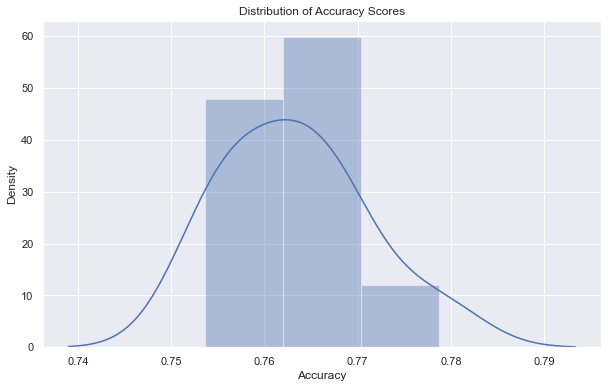

In [56]:
from sklearn.linear_model import LogisticRegression
k = 10
kf = KFold(n_splits=k, random_state=None)
classifier = LogisticRegression(C= 0.25, penalty= 'l2', solver='newton-cg')
result = cross_val_score(classifier , X, Y, cv = kf)
print(result*100)
print("Accuracy: {:.2f} %".format(result.mean()*100))
print("Standard Deviation: {:.2f} %".format(result.std()*100))

print("Avg accuracy: {}".format(result.mean()))
import matplotlib.pyplot as plt
import seaborn as sns

# 'result' contains the array of accuracy scores
sns.set(rc={'figure.figsize':(10, 6)})
sns.distplot(result)
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('Distribution of Accuracy Scores')
plt.show()

[77.92275574 78.60125261 77.08768267 78.28810021 76.565762   76.565762
 76.7223382  77.19206681 76.39686684 79.0078329 ]
Accuracy: 77.44 %
Standard Deviation: 0.90 %
Avg accuracy: 0.7743504199894253


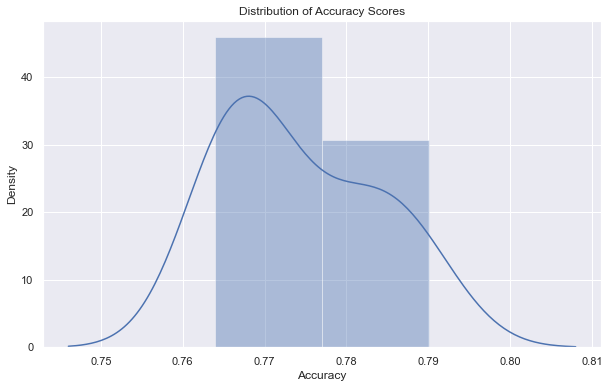

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)
k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(classifier , X, Y, cv = kf)
print(result*100)
print("Accuracy: {:.2f} %".format(result.mean()*100))
print("Standard Deviation: {:.2f} %".format(result.std()*100))

print("Avg accuracy: {}".format(result.mean()))

sns.distplot(result)
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('Distribution of Accuracy Scores')
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)
parameters = [{'n_estimators':[10,100],'criterion':['gini', 'entropy'],'min_samples_split':[2,5,6,8],'min_samples_split':[1,3,4,5]}]
cv1=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv1,
                           n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 78.02 %
Best Parameters: {'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 100}


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 41,max_iter=10000)
classifier.fit(X_train, Y_train)
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']},
             {'C': [0.25, 0.5, 0.75, 1],'penalty': ['l2'], 'solver': [ 'liblinear'],'fit_intercept':[True],'intercept_scaling':[0.25, 0.5, 0.75, 1]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 76.33 %
Best Parameters: {'C': 0.25, 'fit_intercept': True, 'intercept_scaling': 0.25, 'penalty': 'l2', 'solver': 'liblinear'}


[74.89561587 75.3131524  74.11273486 76.2526096  74.8434238  75.41753653
 74.79123173 74.0605428  76.44908616 74.51697128]
Accuracy: 75.07 %
Standard Deviation: 0.77 %
Avg accuracy: 0.7506529050404183


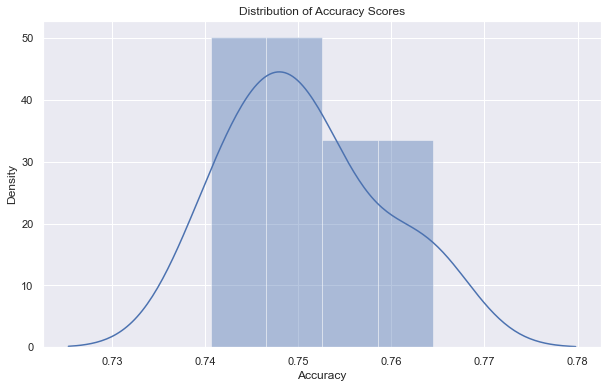

In [60]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(classifier , X, Y, cv = kf)
print(result*100)
print("Accuracy: {:.2f} %".format(result.mean()*100))
print("Standard Deviation: {:.2f} %".format(result.std()*100))

print("Avg accuracy: {}".format(result.mean()))

sns.distplot(result)
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('Distribution of Accuracy Scores')
plt.show()

In [61]:
print("hello")

hello


In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0,min_samples_split=30)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=30,
                       n_estimators=1000, random_state=0)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print('Acccuracy: %.3f' % accuracy_score(Y_test, y_pred))
print('Precision: %.3f' % precision_score(Y_test, y_pred))
print('Recall: %.3f' % recall_score(Y_test, y_pred))
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

[[3193  409]
 [ 641  547]]
Acccuracy: 0.781
Precision: 0.572
Recall: 0.460
F1 Score: 0.510
